# Метод импульса 

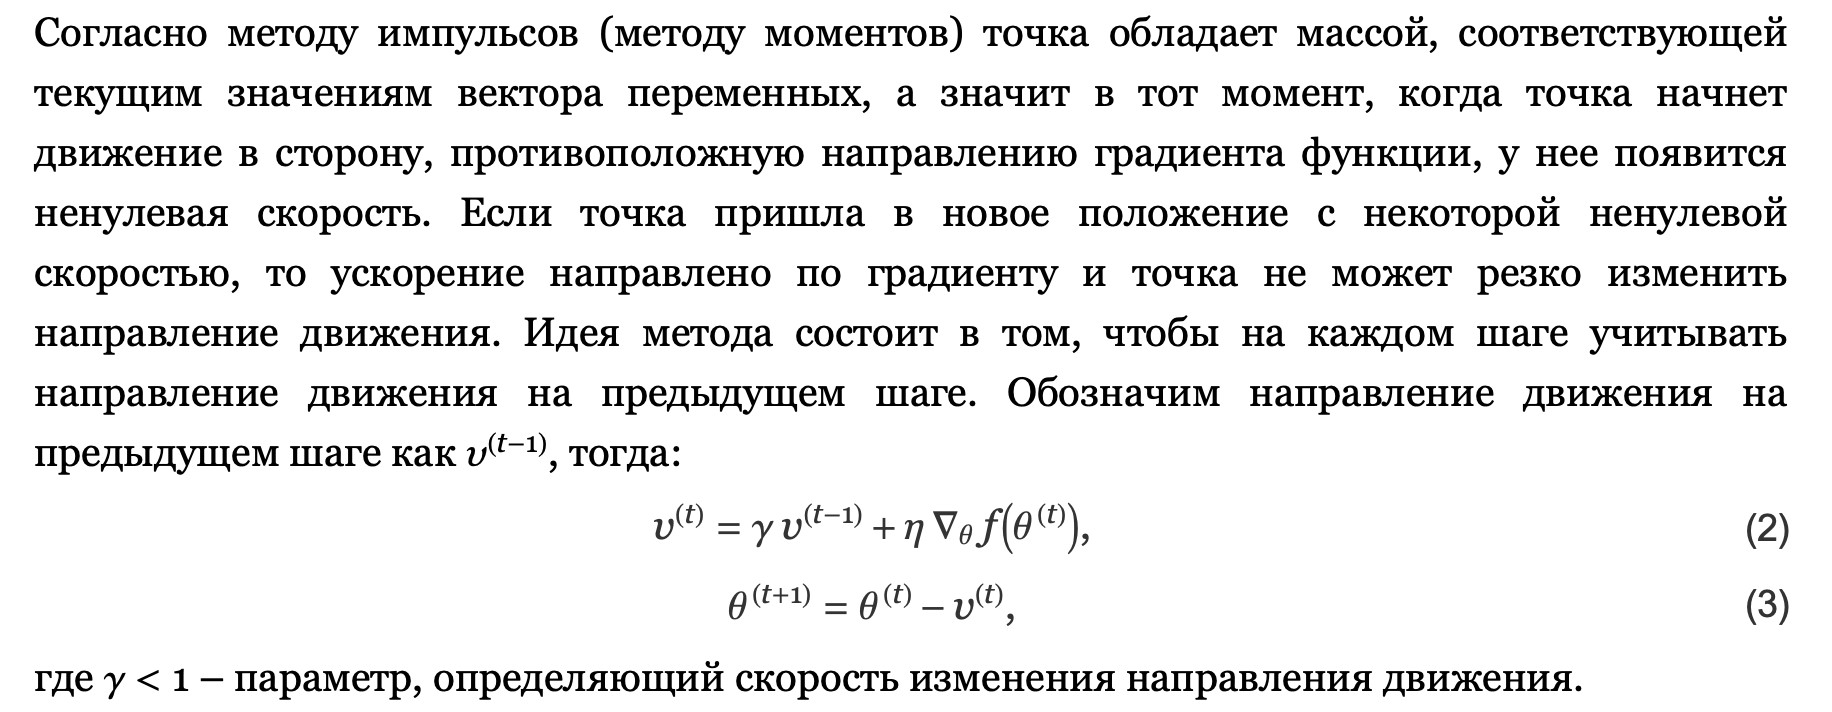

## Реализация метода импульсов

In [33]:
def impulse_method(f, x0, y0, eta, gamma, e, v_x=0, v_y=0, i=0): 
    
    g = grad(f, x0, y0)
    x1 = x0 - eta * g[0]
    y1 = y0 - eta * g[1]
    
    while abs(f(x1, y1) - f(x0, y0)) > e:
        v_x = gamma * v_x + eta * grad(f, x1, y1)[0] 
        v_y = gamma * v_y + eta * grad(f, x1, y1)[1]
        x0, y0 = x1, y1
        x1 -= v_x
        y1 -= v_y
        i += 1
        
    return (x1, y1), i

In [34]:
def f(x, y):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*(y**2))**2 + (2.625 - x + x*(y**3))**2


def dx(f, x, y):
    return 2 * (-1 + y) * (1.5 - x + x*y) + 2*(-1 + y**2)*(2.25 - x + x*y**2) + 2*(-1 + y**3)*(2.625 - x + x*(y**3))


def dy(f, x, y):
    return 2*x*(1.5 - x + x*y) + 4 *x *y* (2.25 - x + x* y**2) + 6* x* y**2 *(2.625 - x + x * y**3)


def grad(f, x0, y0):
    d_x = dx(f, x0, y0)
    d_y = dy(f, x0, y0)
    return d_x, d_y

In [35]:
impulse_method(f, 0.7, 0.4, 0.01, 0.9, 0.0001)

((2.9565595589334137, 0.4937586146847903), 90)

## Сравнение импульса с наискорейшим спуском

In [36]:
def dich_search(f, a, b, e, ex_type): #ex_type = {1 (to find max), -1 (to find min)}
    while abs(b - a) >  e:
        x = (a + b)/2
        x1 = (x - e)
        x2 = (x + e)
        if ex_type * f(x2) < ex_type * f(x1):
            b = x
        else:
            a = x
    return x 

In [37]:
def steepest_descent(f, x0, y0, e, i=0):
    g = grad(f, x0, y0)
    fun = lambda m: f(x0 - m * g[0], y0 - m * g[1])
    eta = dich_search(fun, 0, 1, e, -1)
    x1 = x0 - eta * g[0]
    y1 = y0 - eta * g[1]
    while abs(f(x1, y1) - f(x0, y0)) > e:
        x0, y0 = x1, y1
        eta = dich_search(fun, 0, 1, e, -1)
        g = grad(f, x0, y0)
        x1 -= eta * g[0]
        y1 -= eta * g[1]
        i += 1
    return (x1, y1), i

In [38]:
steepest_descent(f, 0.7, 0.4, 0.01)

((2.4903567416246446, 0.36005031592907016), 12)